# #DuBoisChallenge2024 Challenge 06

Alright, it's time for a Du Bois chart again. We can complete it in three steps:

1. Load the data
2. Test visualisation
3. Final visualisation

But first, we load the required packages:

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from colors import dubois_colors
%matplotlib notebook

## 1. Load the data

We first load the challenge data using pandas. 



In [212]:
df = pd.read_csv('2024/challenge06/data.csv')
df.head(5)

,Year,Negroes,Mulattoes
0,1890,6337980,1113063
1,1860,3542147,411613


So when we load this data, we notice that the data format is incorrect. The second line in the csv has a , at the end. When we remove that and reload the data, it looks correct. (It may already be corrected if you load the data later on.)

Another thing were missing is the data for 1840 and 1800 (they are also not visible in the plot).  I decide to use my darwing program (Inkscape) to estimate the missing data using lines. I do this by drawing lines across the horizontal grid lines. I measure both the black section and the brown/gold section. I use those and the existing two values for 1890 and 1860 to estimate the new data.

In [215]:
plot_data = {
    'y_negroes': [6337980, 3542147, 2510889, 986421],
    'y_mulattoes': [1113063, 411613, 266338, 5],
    'y_whites': [10000000, 10000000, 10000000, 10000000],
    'x': [4,3,2,1],
}

I set the whites data to 10.000.000. The actual value is not that important, as long as it overflows to the right.

## 2. Test visualisation

We then make a first test visualisation, similar like the area chart in challenge 02.

We start with the first two y values from the fake data:

<IPython.core.display.Javascript object>


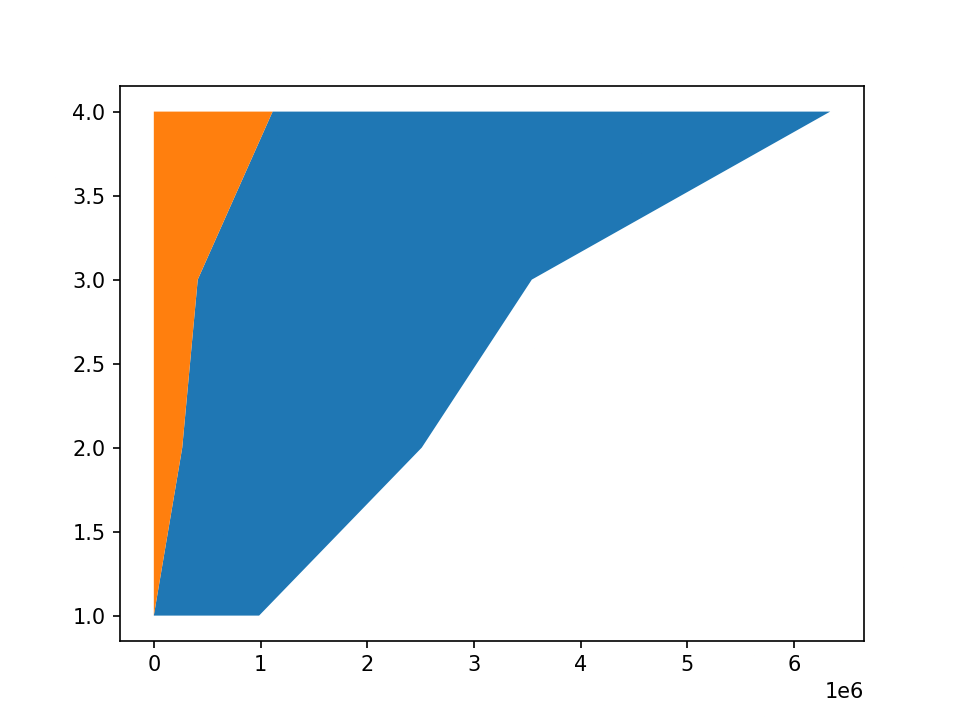

In [216]:
fig, ax = plt.subplots()

ax.fill_betweenx(plot_data['x'], plot_data['y_negroes'], plot_data['y_mulattoes'])
ax.fill_betweenx(plot_data['x'], plot_data['y_mulattoes'], 0)

Now Du Bois does something intersting here. By plotting a part of the data to the other side of a central axis, the visualisation gets a triangle shape. To arrange for that, we need to do some data corrections:

- Split the mulattoes into two equal data sets.
- Turn the whites data into negative numbers.

Let's do that:

In [217]:
# split multattoes data for plotting
plot_data['y_mulattoes_a'] = []
plot_data['y_mulattoes_b'] = []

for value in plot_data['y_mulattoes']:
    plot_data['y_mulattoes_a'].append(value * .5)
    plot_data['y_mulattoes_b'].append(value * -.5)

# correct whites data for plotting
plot_data['y_whites_neg'] = []

for value in plot_data['y_whites']:
    plot_data['y_whites_neg'].append(value * -1)
    
plot_data

{'y_negroes': [6337980, 3542147, 2510889, 986421],
 'y_mulattoes': [1113063, 411613, 266338, 5],
 'y_whites': [10000000, 10000000, 10000000, 10000000],
 'x': [4, 3, 2, 1],
 'y_mulattoes_a': [556531.5, 205806.5, 133169.0, 2.5],
 'y_mulattoes_b': [-556531.5, -205806.5, -133169.0, -2.5],
 'y_whites_neg': [-10000000, -10000000, -10000000, -10000000]}

We can now use this new data to make the plot.

<IPython.core.display.Javascript object>


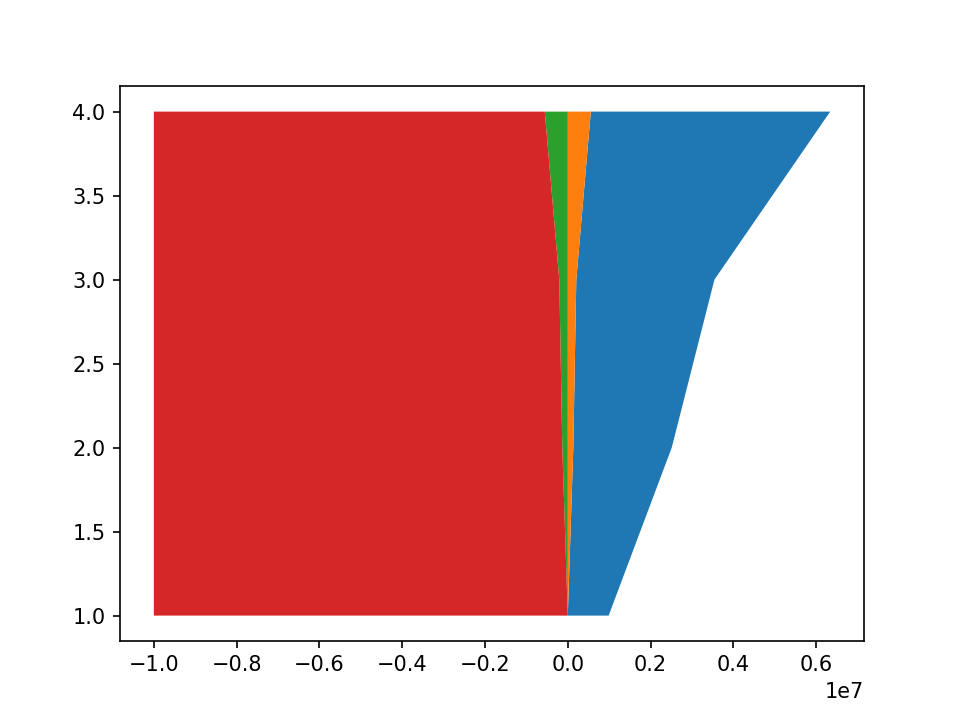

In [218]:
fig, ax = plt.subplots()

ax.fill_betweenx(plot_data['x'], plot_data['y_negroes'], plot_data['y_mulattoes_a'])
ax.fill_betweenx(plot_data['x'], plot_data['y_mulattoes_a'], 0)

ax.fill_betweenx(plot_data['x'], 0, plot_data['y_mulattoes_b'])
ax.fill_betweenx(plot_data['x'], plot_data['y_mulattoes_b'], plot_data['y_whites_neg'])

Now we need to flip the image, both horizontally and vertically. We can do so by changing the x limits and y limits:

<IPython.core.display.Javascript object>


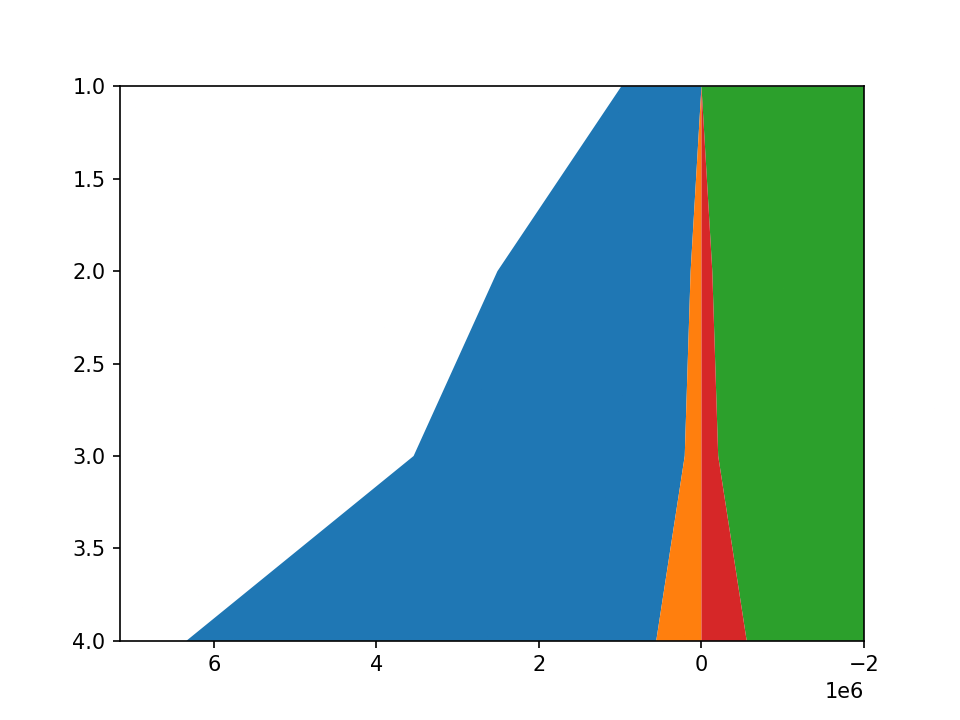

(7154879.0, -2000000.0)

In [219]:
fig, ax = plt.subplots()

# fill positive values
ax.fill_betweenx(plot_data['x'], plot_data['y_negroes'], plot_data['y_mulattoes_a'])
ax.fill_betweenx(plot_data['x'], plot_data['y_mulattoes_a'], 0)

# fill negative values
ax.fill_betweenx(plot_data['x'], plot_data['y_mulattoes_b'], plot_data['y_whites_neg'])
ax.fill_betweenx(plot_data['x'], 0, plot_data['y_mulattoes_b'])

ax.set_ylim(4, 1)

xlim = ax.get_xlim()
ax.set_xlim(xlim[1], -2000000)

Now there is something interesting going on here. When I plot the data like this, you clearly see the two middle sections (orange and green) have a slight dent at y-value 3. The visual of Du Bois does not have this. His moves in a straight line from bottom to top. 

So I assume he uses the values at the bottom and just makes a straigh line towards the top. Besides that, the original design uses gradients. By removing a clear split between 'negroes', 'mulattoes', and 'whites', I think Du Bois tries to emphasize that there is no clear split between the categories. 

So we need to take that into account. We can do so by plotting the 1st and 4th element of thos lists.

<IPython.core.display.Javascript object>


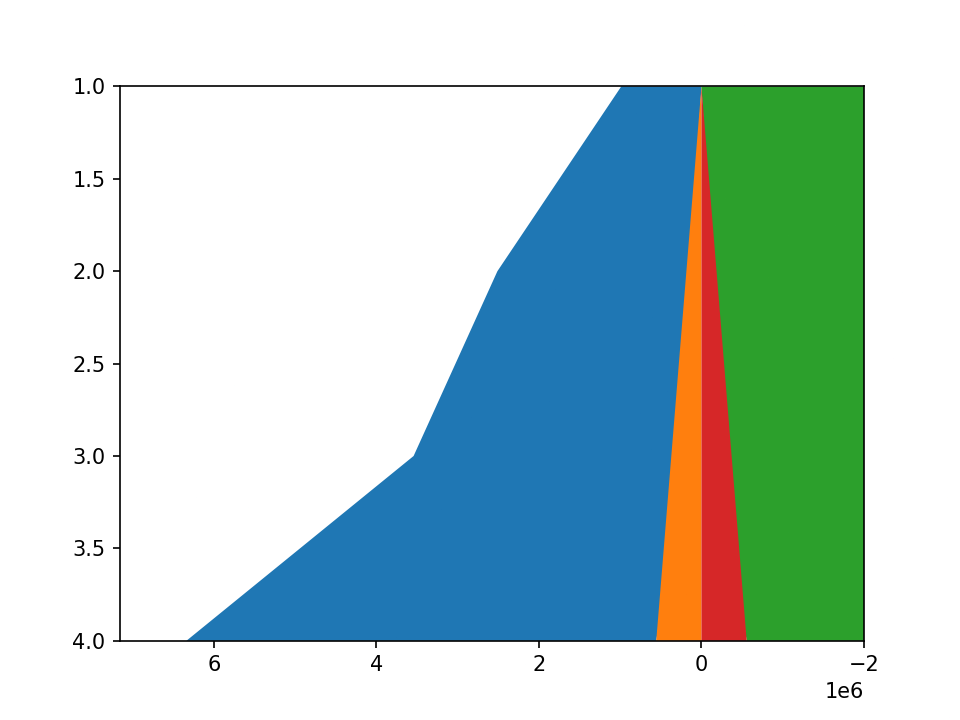

(7154879.0, -2000000.0)

In [224]:
fig, ax = plt.subplots()

ax.fill_betweenx(
    plot_data['x'], 
    plot_data['y_negroes'], 
    plot_data['y_mulattoes_a']
)

# modify this fill area
ax.fill_betweenx(
    [plot_data['x'][0], plot_data['x'][3]], 
    [plot_data['y_mulattoes_a'][0], plot_data['y_mulattoes_a'][3]], 
    0
)

ax.fill_betweenx(
    plot_data['x'], 
    plot_data['y_mulattoes_b'], 
    plot_data['y_whites_neg']
)
# and this one
ax.fill_betweenx(
    [plot_data['x'][0], plot_data['x'][3]], 
    0, 
    [plot_data['y_mulattoes_b'][0],plot_data['y_mulattoes_b'][3]], 
)

ax.set_ylim(4, 1)

xlim = ax.get_xlim()
ax.set_xlim(xlim[1], -2000000)

Alright, that's better. With the plot ready. We can start adding Du Bois's flavour to it.

## 3. Final visualisation

For this challenge, I share the code for the final visualisation. Was was a bit surprised by the amount of work that went into this one. So I hope it can help you out.

<IPython.core.display.Javascript object>


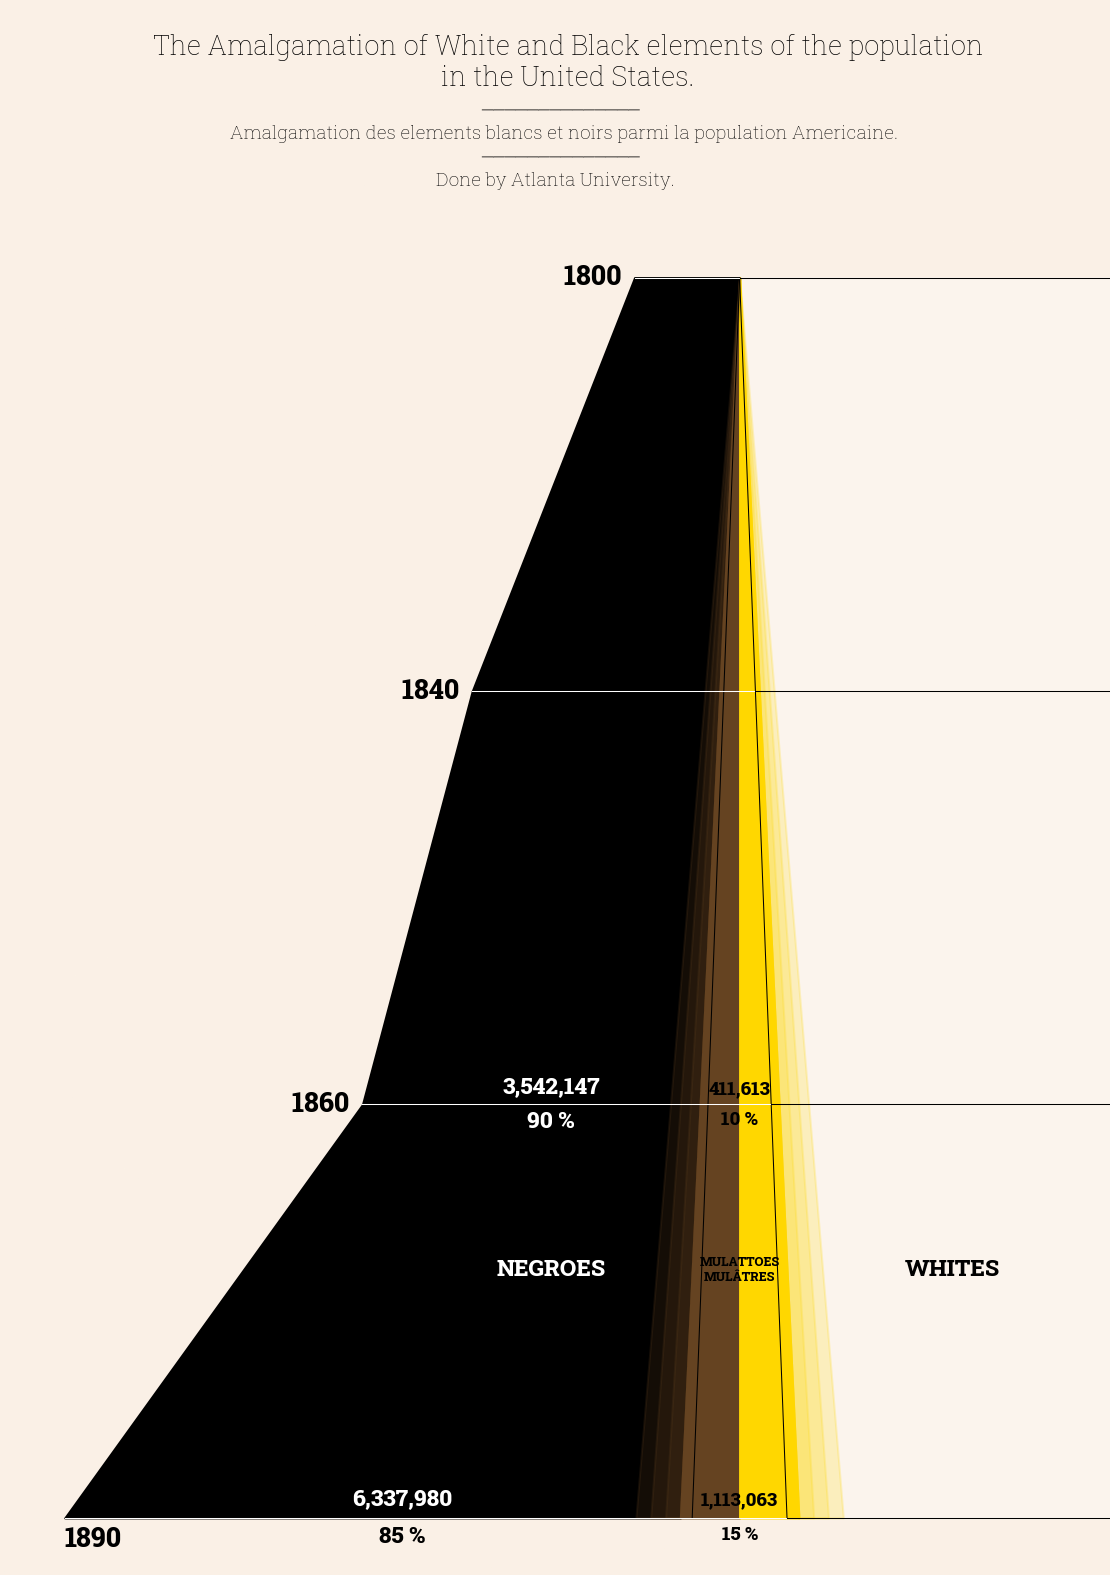

6337980
3542147


In [223]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

ax.fill_betweenx(
    plot_data['x'], 
    plot_data['y_negroes'], 
    plot_data['y_mulattoes_a'],
    color=dubois_colors['black'],
)
ax.fill_betweenx(
    [plot_data['x'][0], plot_data['x'][3]], 
    [plot_data['y_mulattoes_a'][0], plot_data['y_mulattoes_a'][3]], 
    0,
    color=dubois_colors['brown'],
)

ax.fill_betweenx(
    [plot_data['x'][0], plot_data['x'][3]], 
    [plot_data['y_mulattoes_b'][0],plot_data['y_mulattoes_b'][3]], 
    [plot_data['y_whites_neg'][0],plot_data['y_whites_neg'][3]], 
    color='white',
    alpha=.3,
)
ax.fill_betweenx(
    [plot_data['x'][0], plot_data['x'][3]], 
    0, 
    [plot_data['y_mulattoes_b'][0],plot_data['y_mulattoes_b'][3]], 
    color=dubois_colors['gold'],
)

for value in range(1,4):
    ax.fill_betweenx(
        [plot_data['x'][0], plot_data['x'][3]], 
        [plot_data['y_mulattoes_a'][0]*(1+value/4), plot_data['y_mulattoes_a'][3]*(1+(value/5))], 
        [plot_data['y_mulattoes_a'][0], plot_data['y_mulattoes_a'][3]], 
        color=dubois_colors['brown'],
        alpha=.2
    )
    
    ax.fill_betweenx(
        [plot_data['x'][0], plot_data['x'][3]], 
        [plot_data['y_mulattoes_b'][0]*(1+value/4), plot_data['y_mulattoes_b'][3]*(1+(value/5))], 
        [plot_data['y_mulattoes_b'][0], plot_data['y_mulattoes_b'][3]], 
        color=dubois_colors['gold'],
        alpha=.2
    )

line_reduction = .8
ax.plot(
    [plot_data['y_mulattoes_a'][0]*line_reduction, plot_data['y_mulattoes_a'][3]],
    [4, 1],
    lw=.5,
    color='black',
)
ax.plot(
    [plot_data['y_mulattoes_b'][0]*line_reduction, plot_data['y_mulattoes_b'][3]],
    [4, 1],
    lw=.5,
    color='black',
) 

# plt horizontal lines
for index, value in enumerate(plot_data['y_negroes']):
    plot_y = plot_data['y_mulattoes_b'][0] * line_reduction
    plot_y = plot_y - (plot_y * ((1/3)*index))
    ax.plot(
        [plot_data['y_negroes'][index], plot_y],
        [plot_data['x'][index], plot_data['x'][index]],
        lw=.5,
        color='white',
    )
    ax.plot(
        [plot_y, plot_data['y_whites_neg'][0]],
        [plot_data['x'][index], plot_data['x'][index]],
        lw=.5,
        color=dubois_colors['black'],
    )


ax.set_ylim(4.1, 0.9)

xlim = ax.get_xlim()
ax.set_xlim(xlim[1], -4000000)

ax.axis('off')

# add titles
rob_font_title = {'fontname':'Roboto Slab', 'fontweight': 'light'}
rob_font_sub = {'fontname':'Roboto Slab', 'fontweight': 'heavy'}

plt.text(
    x=.5,
    y=.96,
    s='''
    The Amalgamation of White and Black elements of the population
    in the United States.
    ''',
    va='center',
    ha='center',
    transform=fig.transFigure,
    fontsize=13,
    **rob_font_title
)

plt.text(
    x=.5,
    y=.93,
    s='  ──────────────',
    va='center',
    ha='center',
    transform=fig.transFigure,
    fontsize=9,
    alpha=.5
)

plt.text(
    x=.5,
    y=.915,
    s='''
    Amalgamation des elements blancs et noirs parmi la population Americaine.
    ''',
    va='center',
    ha='center',
    transform=fig.transFigure,
    fontsize=9,
    **rob_font_title
)

plt.text(
    x=.5,
    y=.90,
    s='  ──────────────',
    va='center',
    ha='center',
    transform=fig.transFigure,
    fontsize=9,
    alpha=.5
)

plt.text(
    x=.5,
    y=.885,
    s='Done by Atlanta University.',
    va='center',
    ha='center',
    transform=fig.transFigure,
    fontsize=9,
    **rob_font_title
)

plt.text(
    x=plot_data['y_negroes'][1]/2,
    y=3.4,
    s='NEGROES',
    va='center',
    ha='center',
    fontsize=11,
    color='white',
    **rob_font_sub
)

for index, value in enumerate(plot_data['y_negroes'][:2]):
    print(value)
    plt.text(
        x=value/2,
        y=plot_data['x'][index] * 0.995,
        s=format(value,','),
        va='bottom',
        ha='center',
        fontsize=11,
        color='white',
        **rob_font_sub
    )
    
    percentage = round(value / (value + plot_data['y_mulattoes'][index]) *100)
    
    label_color = 'white'
    if index == 0:
        label_color = 'black'
    plt.text(
        x=value/2,
        y=plot_data['x'][index] * 1.005,
        s=str(percentage)+ ' %',
        va='top',
        ha='center',
        fontsize=11,
        color=label_color,
        **rob_font_sub
    )
    
for index, value in enumerate(plot_data['y_mulattoes'][:2]):
    plt.text(
        x=0,
        y=plot_data['x'][index] * 0.995,
        s=format(value,','),
        va='bottom',
        ha='center',
        fontsize=9,
        color='black',
        **rob_font_sub
    )
    
    percentage = round(value / (value + plot_data['y_negroes'][index]) *100)
    plt.text(
        x=0,
        y=plot_data['x'][index] * 1.005,
        s=str(percentage)+ ' %',
        va='top',
        ha='center',
        fontsize=9,
        color='black',
        **rob_font_sub
    )
    
    

plt.text(
    x=-2000000,
    y=3.4,
    s='WHITES',
    va='center',
    ha='center',
    fontsize=11,
    color='black',
    **rob_font_sub
)

plt.text(
    x=0,
    y=3.4,
    s='MULATTOES\nMULÂTRES',
    va='center',
    ha='center',
    fontsize=6,
    color='black',
    **rob_font_sub
)


year_labels = ['1890', '1860', '1840', '1800'] 
for index, label in enumerate(year_labels):
    label_x = plot_data['y_negroes'][index]
    label_y = plot_data['x'][index]
    
    if index == 0:
        plt.text(        
            x=label_x,
            y=label_y*1.005,
            s=label,
            va='top',
            ha='left',
            fontsize=13,
            **rob_font_sub
        )
        continue
    
    plt.text(        
        x=label_x,
        y=label_y,
        s=label+'  ',
        va='center',
        ha='right',
        fontsize=13,
        **rob_font_sub
    )
    

# posistion the plot
plt.subplots_adjust(top=0.85, bottom=.01, left=-.02, right=1.05)

Sorry for not including the zigzag at the top yet. 